##### $Name:\,\color{blue}{Bin\,Lu,\,Maymoonah\,Bashir,\,Christopher\,J.\,Watson}$
##### $School:\,\color{blue}{Marcos\,School\,of\,Engineering,\,University\,of\,San\,Diego}$
##### $Class:\,\color{blue}{AAI\,500-\,Probability\,\&\,Stats\,for\,AI}$
##### $Assignment:\,\color{blue}{MSAAI\,Final Project-DataProcessing}$
##### $Date:\,\color{blue}{10/22/2022}$

### Problem - Data PreProcessing

Statement - One of the single biggest problems with our dataset was the data itself. There were many unreadable characters as well as data fields which had been incorrectly input or difficult to work with. We created a program to mitigate these issues. 
$\newline$
1) The special characters were simply deleted. This made a few of the make fields empty so model was copied into them to ensure they weren't completely blank.
$\newline$
2) Each field had special considerations, so for each field we made a small preprocessing functions and added them to a dictionary so that it would get used on the correct column.

In [13]:
# Imports
import data_fix as dfix
import data_utils_g1 as du
import matplotlib.pyplot as plt
import numpy

In [2]:
# scrub the datafile
dfix.init()
# This function will automatically prompt for a file and a save location using a dialog selector
data = dfix.scrub_txt_file()

Replacing all special characters for clean read
Asking for cleaned data file save location
Printing save location:
C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/sanitized_1.txt
C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/sanitized_1_final.csv


In [3]:
# display the data
display(data.head(15))

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3,,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,SANTA FE,2016,Jeep,Yes,Diesel,2,,160931,4,Automatic,Front,4-5,Left wheel,White,4
6,45656768,1803,761,TOYOTA,PRIUS,2010,Hatchback,Yes,Hybrid,1.8,,258909,4,Automatic,Front,4-5,Left wheel,White,12
7,45816158,549,751,HYUNDAI,SONATA,2013,Sedan,Yes,Petrol,2.4,,216118,4,Automatic,Front,4-5,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,CAMRY,2014,Sedan,Yes,Hybrid,2.5,,398069,4,Automatic,Front,4-5,Left wheel,Black,12
9,45756839,26657,0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,,128500,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12


### For main section of cleaning code please see file data_fix.py Appendix-1

We were also give a data dictionary which we stored in case it was needed later.

In [4]:
# Given data dictionary
data_dict= {"ID": "Unique identifier/key", "Price": "Price of the car", "Levy": "Tax applied to purchase price", 
            "Manufacturer": "Name of car manufacturer", "Model": "Model of the car", 
            "Prod_year": "Year the car was produced", "Category": "Category by body type of the car", 
            "Leather_interior": "Whether or not the car has a leather interior", "Fuel_type": "Fuel type of the car", 
            "Engine_volume": "Engine size/volume of the car", "Mileage": "Total mileage on the car", 
            "Cylinders": "Number of cylinders", "Gear_box_type": "Type of gear box", "Drive_wheels": 
            "Drive wheels on the car", "Doors": "Number of doors on the car", "Wheel": "Side of the steering wheel", 
            "Color": "Exterior color of the car", "Airbags": "Number of airbags in the car"}

file_name = "..\data\data_dictionary.txt"
# we created a utility library and saved it as data_utils_g1.py
du.save_py_dict(data_dict)

Asking for dictionary save file path


'C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/data_dictionary.json'

We looked at the data just to see what unique values we were dealing with

In [5]:
# we found quickly we would need to deal with model a little differently
print('Gearbox Uniques', data.Gear_box_type.unique())
print('Cylinders Uniques', data.Cylinders.unique())
print('Manufacturer Uniques', data.Manufacturer.unique())
model = data.Model.unique()
print('Number of Model Uniques', len(model))

Gearbox Uniques ['Automatic' 'Tiptronic' 'Variator' 'Manual']
Cylinders Uniques ['6' '4' '8' '1' '12' '3' '2' '16' '5' '7' '9' '10' '14']
Manufacturer Uniques ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO'
 'IVECO DAYLY' 'HAVAL' 'HUMMER' 'SCION' 'GONOW' 'UAZ' 'MERCURY' 'ZAZ'
 'ROVER' 'SEAT' 'LANCIA' 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB'
 'LAMBORGHINI' 'ROLLS-ROYCE' 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Number of Model Uniques 1481


We also tried looking and sampling the data in different ways to make sense of it.

(array([2.66069995e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.38318775e-11]),
 array([1.00000000e+00, 3.75821514e+06, 7.51642929e+06, 1.12746434e+07,
        1.50328576e+07, 1.87910717e+07, 2.25492859e+07, 2.63075000e+07]),
 [<matplotlib.patches.Polygon at 0x27f17820eb0>])

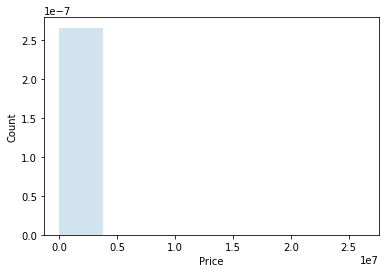

In [11]:
data_types = {}
data_types['Price'] = 'int32'
data_types['Mileage'] = 'int32'
data_types['Prod_year'] = 'int32'
data_types['Airbags'] = 'int32'
data = data.astype(data_types)
data = data.sort_values(by=['ID'])

# label the plot
plt.xlabel("Price")
plt.ylabel("Count")

# create histogram
plt.hist(data['Price'], bins=7, density=True, histtype='stepfilled',
         alpha=0.2, label='histogram of data')

(array([2.83228923e-05, 4.49120149e-05, 4.65304659e-05, 1.65891226e-05,
        1.21383824e-05, 3.64151472e-06, 2.83228923e-06]),
 array([ 2805.,  9258., 15711., 22164., 28617., 35070., 41523., 47976.]),
 [<matplotlib.patches.Polygon at 0x27f17862e50>])

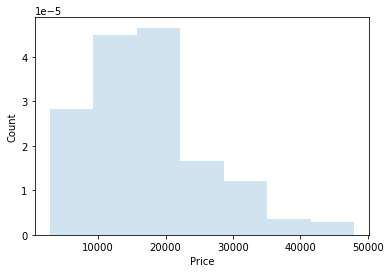

In [12]:
# This function samples the data at number 'n' per sample
sample = du.random_mean_sample(data['Price'], 50)

# label the plot
plt.xlabel("Price")
plt.ylabel("Count")

# create histogram
# note this is a sorted sample set and we remove the last one
# we know from looking at the data the last sample is messed up from a large outlier
plt.hist(sample[:-1], bins=7, density=True, histtype='stepfilled',
         alpha=0.2, label='histogram of data')

Number of samples 383


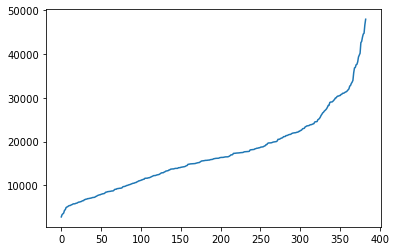

In [17]:
sample2 = sample[:-1]
plt.plot(sample2)
print('Number of samples', len(sample2))

In [21]:
mu = numpy.mean(sample2, axis=0)
sigma = numpy.std(sample2, axis=0)
print('The mean of the sampled set is: ', mu)
print('The sigma of the sampled set is: ', sigma)

The mean of the sampled set is:  17214.720626631854
The sigma of the sampled set is:  8602.999216089052


### In conclusion, we cleaned the data enough to where we could start really looking at it and deciding how we would create a model for it.